In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [2]:
bp_reading = pd.read_csv('../../datasets/blood_pressure.csv')

In [3]:
bp_reading.sample(10)

,patient,sex,agegrp,bp_before,bp_after
22,23,Male,46-59,151,136
39,40,Male,46-59,160,174
48,49,Male,60+,171,185
86,87,Female,46-59,143,148
113,114,Female,60+,151,177
41,42,Male,60+,158,158
109,110,Female,60+,163,154
9,10,Male,30-45,158,125
92,93,Female,46-59,144,157
70,71,Female,30-45,162,133


In [4]:
bp_reading.shape

(120, 5)

In [5]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


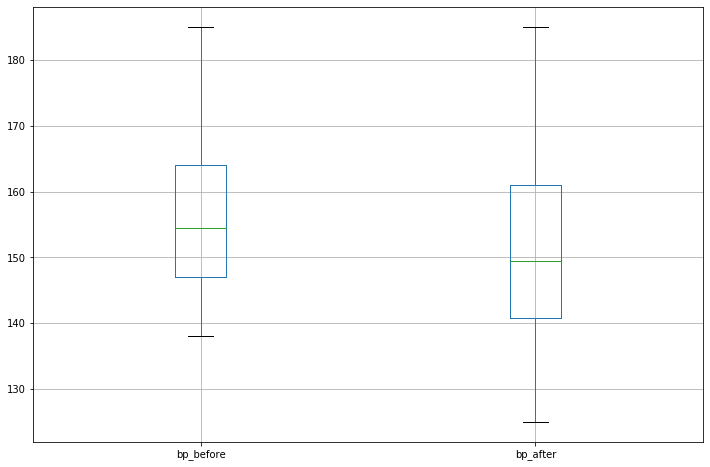

In [6]:
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(12,8))

In [7]:
stats.levene(bp_reading['bp_after'], bp_reading['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

*p value is significant, means that variances are different and we can't use t-test for that data set*

In [8]:
bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before'])

In [9]:
bp_reading.head()

,patient,sex,agegrp,bp_before,bp_after,bp_diff
0,1,Male,30-45,143,153,0.906743
1,2,Male,30-45,163,170,0.726496
2,3,Male,30-45,153,168,1.207155
3,4,Male,30-45,153,142,-0.354987
4,5,Male,30-45,146,141,0.005508


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c91324ed0>]],
      dtype=object)

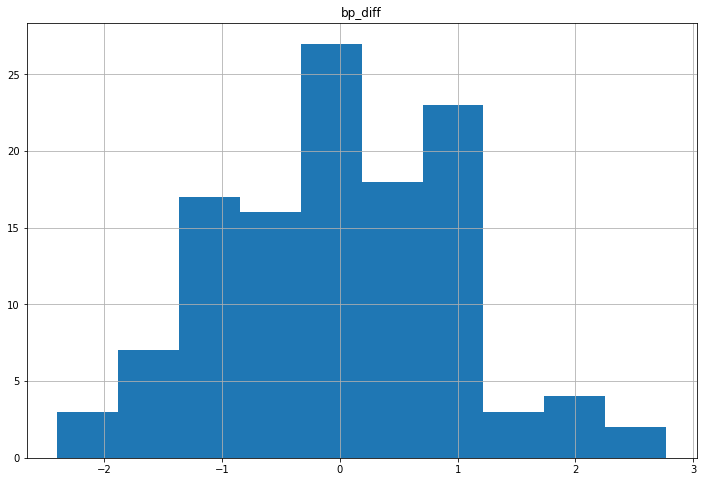

In [10]:
bp_reading[['bp_diff']].hist(figsize=(12,8))

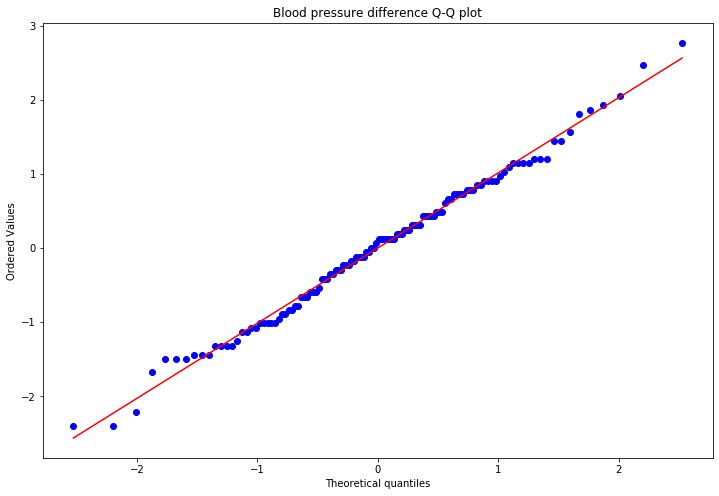

In [11]:
plt.figure(figsize=(12,8))
stats.probplot(bp_reading['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

In [12]:
stats.shapiro(bp_reading['bp_diff'])

(0.9926842451095581, 0.7841846942901611)

In [14]:
stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [15]:
rp.ttest(bp_reading['bp_after'], bp_reading['bp_before'], 
         paired = True, equal_variances = False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000
